In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier 
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

In [2]:
df = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day7/HR_comma_sep.csv")
ohc = OneHotEncoder(sparse_output = False, drop = 'first')
ct = make_column_transformer((ohc, make_column_selector(dtype_include=object)), 
                             ("passthrough", make_column_selector(dtype_include=['int64', 'float64'])), verbose_feature_names_out = False).set_output(transform='pandas')
X = df.drop('left', axis=1)
X = ct.fit_transform(X)
y = df['left']

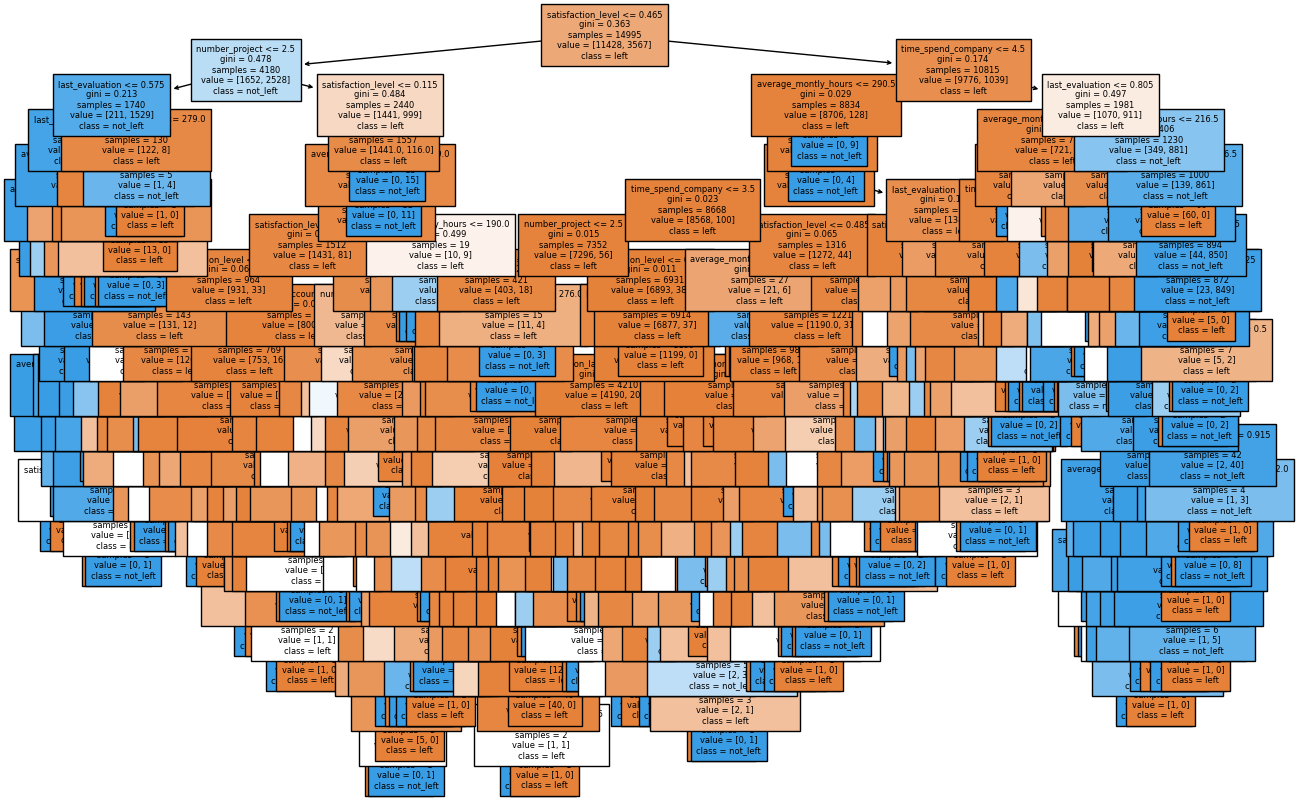

In [3]:
dtc = DecisionTreeClassifier()
dtc.fit(X, y)

#plotting tree
plt.figure(figsize=(15,10))
plot_tree(dtc,feature_names=list(X.columns),
               class_names=['left', 'not_left'],
               filled=True,fontsize=6);

In [4]:
#gridsearch to find best max_depth, min_samples_leaf, min_samples_split
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state=24)

params = {'min_samples_split' : np.arange(2, 35, 5), 'min_samples_leaf':np.arange(1, 35, 5), 'max_depth': [None, 4, 3, 2, 6, 8, 10]}
gcv = GridSearchCV(dtc, param_grid = params, cv = kfold, scoring = 'neg_log_loss')
gcv.fit(X, y)
print(gcv.best_score_)
print(gcv.best_params_)

-0.10425916698269218
{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 12}


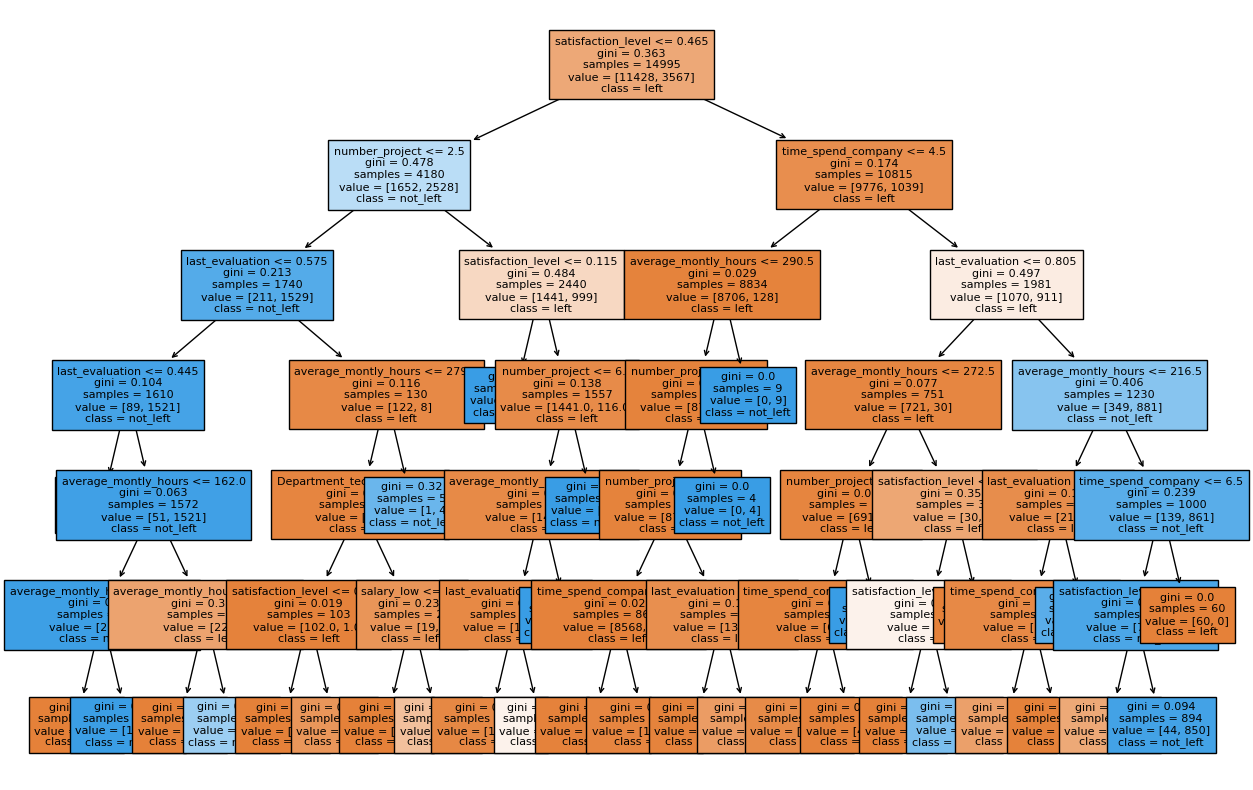

In [5]:
#plotting best tree 
best_tree = gcv.best_estimator_
plt.figure(figsize=(15,10))
plot_tree(best_tree,feature_names=list(X.columns),
               class_names=['left', 'not_left'],
               filled=True,fontsize= 8);

In [6]:
tst_hr  = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day7/tst_hr.csv")

dum_tst_hr = ct.transform(tst_hr)


In [7]:
best_model = gcv.best_estimator_
best_model.predict(dum_tst_hr)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)